## 이미지 데이터 전처리

In [1]:
import tensorflow as tf

In [2]:
import os

image_directory = '/aiffel/aiffel/motorcycle/Dataset/images'

input_img_files = sorted([os.path.join(image_directory, fname) 
                          for fname in os.listdir(image_directory) 
                          if not (('fuse' in fname) or ('save' in fname))])
target_img_files = sorted([os.path.join(image_directory, fname) 
                           for fname in os.listdir(image_directory) 
                           if 'fuse' in fname])

In [ ]:
# 입력 데이터 파일 확인
input_img_files

In [ ]:
# 타겟 데이터 파일 확인
target_img_files

In [ ]:
# 입력 데이터 개수 확인
len(input_img_files)

In [ ]:
# 타겟 데이터 개수 확인
len(target_img_files)

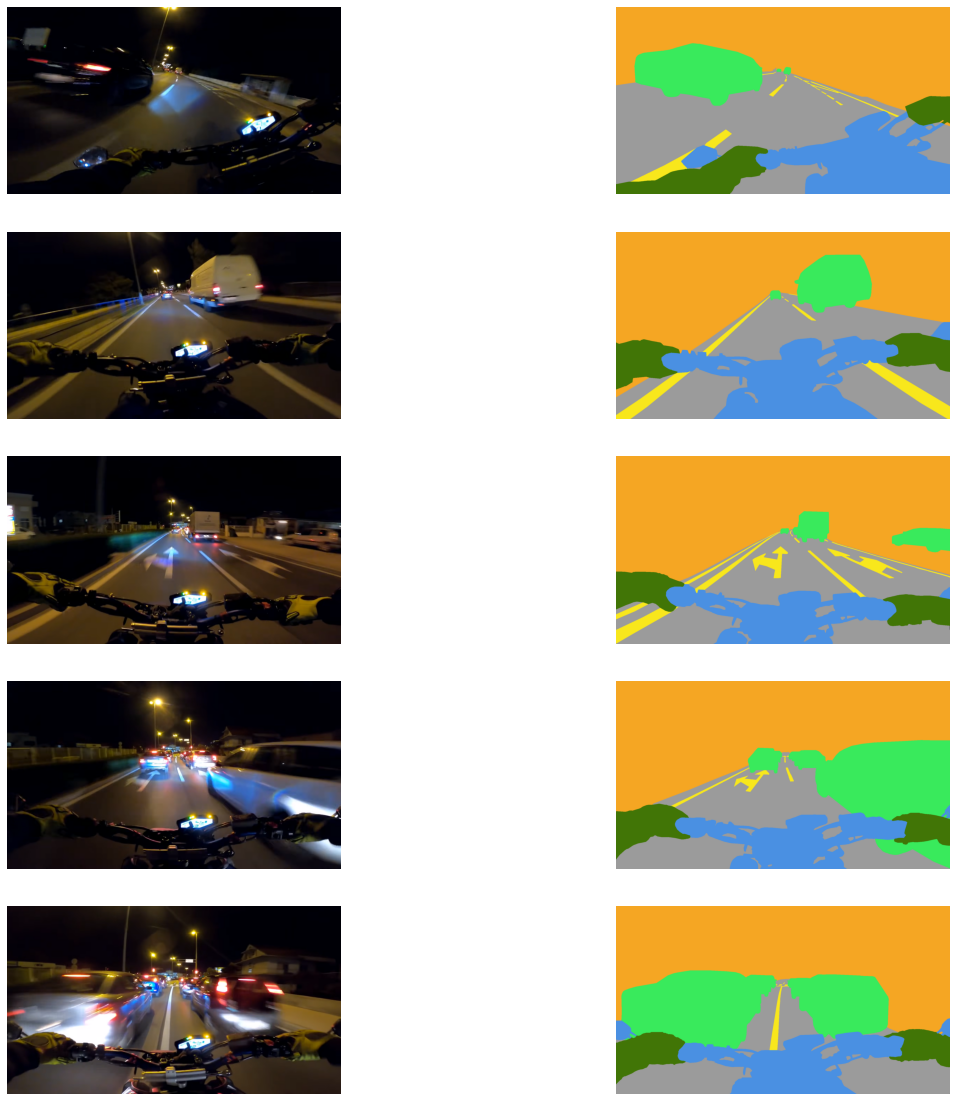

In [4]:
# 데이터 시각화 확인
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

plt.figure(figsize=(20,20))
for j in range(5):
    plt.subplot(5, 2, 2 * j + 1)
    plt.axis("off")
    plt.imshow(load_img(input_img_files[j]))
    plt.subplot(5, 2, 2 * j + 2)
    plt.axis("off")
    plt.imshow(load_img(target_img_files[j]))

In [5]:
# 타겟 데이터의 내부 값 확인
import numpy as np

target = load_img(target_img_files[0],color_mode='grayscale')
target = img_to_array(target)
target = target.astype("uint8")
color = np.unique(target)
color

array([ 89, 132, 155, 165, 175, 213], dtype=uint8)

**라벨 6개로 구성되어있음을 확인할 수 있다**

In [6]:
label = dict()

for i in range(6):
    label[color[i]] = i

In [7]:
label

{89: 0, 132: 1, 155: 2, 165: 3, 175: 4, 213: 5}

In [8]:
import numpy as np
import random

img_size = (128, 128)
num_imgs = len(input_img_files)

random.Random(1337).shuffle(input_img_files)
random.Random(1337).shuffle(target_img_files)

def path_to_input_image(path):
    return img_to_array(load_img(path, target_size=img_size))

def path_to_target(path):
    img = img_to_array(
        load_img(path, target_size=img_size, color_mode="grayscale"))
    img = img.astype("uint8")
    for c in color:
        img = np.where(img==c, label[c], img)
        
    return img

input_imgs = np.zeros((num_imgs,) + img_size + (3,), dtype="float32")
targets = np.zeros((num_imgs,) + img_size + (1,), dtype="uint8")

for i in range(num_imgs):
    input_imgs[i] = path_to_input_image(input_img_files[i])
    targets[i] = path_to_target(target_img_files[i])

In [9]:
targets[0].shape

(128, 128, 1)

In [10]:
input_imgs[0].shape

(128, 128, 3)

In [11]:
num_test_samples = int(0.2 * num_imgs)
num_val_samples = int(0.2 * num_imgs)
train_input_imgs = input_imgs[:-(num_test_samples + num_val_samples)]
train_targets = targets[:-(num_test_samples + num_val_samples)]
val_input_imgs = input_imgs[-(num_test_samples + num_val_samples):-num_test_samples]
val_targets = targets[-(num_test_samples + num_val_samples):-num_test_samples]
test_input_imgs = input_imgs[-num_test_samples:]
test_targets = targets[-num_test_samples:]

In [12]:
train_input_imgs.shape

(120, 128, 128, 3)

In [13]:
train_input_imgs[0][0][0]

array([ 8.,  7., 20.], dtype=float32)

## 데이터 증강

In [ ]:
#numpy_array load
def path_to_input_image(path):
    return img_to_array(load_img(path, target_size=img_size))

In [ ]:
def path_to_target(path):
    img = img_to_array(
        load_img(path, target_size=img_size, color_mode="grayscale")
    )
    img = img.astype("uint8")
    for c in class_id:
        img = np.where(img==c, label[c], img)
    return img

In [46]:
# random augmentation
# 좌우 flip / bright 조절 -> img_to_array 적용해보자!
def augment(image):
    image = array_to_img(image)
    image = tf.image.random_flip_left_right(image) # 좌우 대칭
    #image = tf.image.random_brightness(image, max_delta=0.2) # 밝기 조절
    image = tf.clip_by_value(image, 0, 1)
    image_array = img_to_array(image)
    return image_array

In [ ]:
#이미지 사이즈따라 데이터셋 구성하는 함수
def img_size_data(img_size):
    num_imgs = len(input_img_paths)

    # data random shuffle
    random.Random(1337).shuffle(input_img_paths)
    random.Random(1337).shuffle(target_img_paths)

    # array 초기화
    input_imgs = np.zeros((num_imgs,) + img_size + (3,), dtype="float32")
    targets = np.zeros((num_imgs,) + img_size + (1,), dtype="uint8")

    # data를 초기화된 array에 할당
    for i in range(num_imgs):
        input_imgs[i] = path_to_input_image(input_img_paths[i])
        targets[i] = path_to_target(target_img_paths[i])

    # 200개중 40개 test set으로 사용 나머지는 train에 사용
    num_val_samples = int(0.2 * num_imgs)
    train_input_imgs = input_imgs[:-num_val_samples]
    train_targets = targets[:-num_val_samples]
    val_input_imgs = input_imgs[-num_val_samples:]
    val_targets = targets[-num_val_samples:]

    return train_input_imgs, train_targets, val_input_imgs, val_targets

In [ ]:
def apply_normalize_on_dataset(with_aug=False):

    # input image size 적용
    img_size = 224,224
    x, y, val_x, val_y = img_size_data(img_size)

    # augment 함수 적용 (train set에만 적용)
    if with_aug:

        for i in range(len(x)):
            x_img, y_img = array_to_img(x[i]), array_to_img(y[i])
            x_i, y_i = augment(x_img[i], y_img[i])
            x_i, y_i = img_to_array(x_i), img_to_array(y_i)
            x[i], y[i] = x_i, y_i

    return x, y, val_x, val_y

In [15]:
# Image show
import matplotlib.pyplot as plt

def vis_image(image):
    plt.rcParams['figure.figsize'] = (10, 10) # set figure size  
    plt.imshow(image) 
    plt.show()

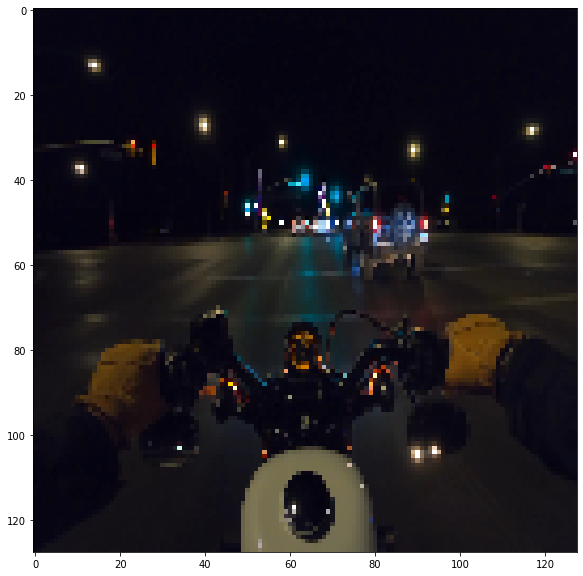

In [23]:
from tensorflow.keras.utils import array_to_img, img_to_array
test_image = array_to_img(tf.image.random_flip_left_right(train_input_imgs[0]))
#test_image = tf.image.random_flip_left_right(train_input_imgs[0])
vis_image(test_image)

In [47]:
from tensorflow.keras.utils import array_to_img, img_to_array

def apply_augment_on_dataset(x, is_test=False, with_aug=False):    
    result_x = np.empty(shape=x.shape)
    #result_y = np.empty(shape=y.shape)
    
    if not is_test and with_aug: 
        for i in range(len(x)):            
            result_x[i] = augment(x[i])
    return result_x

In [48]:
train_input_imgs_aug = apply_augment_on_dataset(train_input_imgs, is_test=False, with_aug=True)

In [49]:
train_input_imgs_aug[0][0][0]

array([1., 1., 1.])

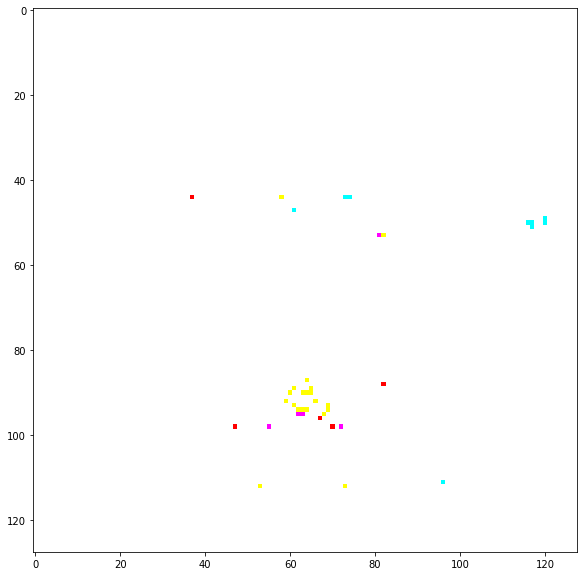

In [51]:
test_image = array_to_img(tf.image.random_flip_left_right(train_input_imgs[0]))
#test_image = tf.image.random_flip_left_right(train_input_imgs[0])
vis_image(train_input_imgs_aug[10])

In [44]:
train_input_imgs_aug[1].shape

(128, 128, 3)

#### 산님 코드

In [ ]:
len(input_img_files)

In [ ]:
input_arrays=[]
for i in range(len(input_img_files)):
    input_arrays[i] = path_to_input_image(input_img_files[i])

## 모델 정의 및 학습

***
**U-Net**
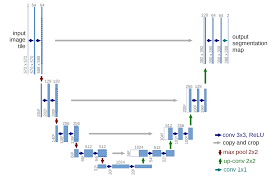

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Dropout, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

def build_model(img_size, num_classes):
    inputs = Input(shape=img_size + (3,))
    rescaling = Rescaling(1./255)(inputs)
    #Contracting Path
    conv1 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(rescaling)
    conv1 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same',kernel_initializer='he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
  
    conv5 = Conv2D(1024, 3, activation='relu', padding='same',kernel_initializer='he_normal')(pool4) 
    conv5 = Conv2D(1024, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv5)
  
    #Expanding Path
    up6 = Conv2DTranspose(512, 2, activation='relu', strides=(2,2), kernel_initializer='he_normal')(conv5)
    merge6 = concatenate([conv4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv6)
    up7 = Conv2DTranspose(256, 2, activation='relu', strides=(2,2), kernel_initializer='he_normal')(conv6)
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv7)
    up8 = Conv2DTranspose(128, 2, activation='relu', strides=(2,2), kernel_initializer='he_normal')(conv7)
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv8)
    up9 = Conv2DTranspose(64, 2, activation='relu', strides=(2,2), kernel_initializer='he_normal')(conv8)
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv9)     
    conv10 = Conv2D(num_classes, 3, activation='softmax', padding='same',kernel_initializer='he_normal')(conv9)

    model = Model(inputs = inputs, outputs = conv10)
    return model

In [ ]:
model = build_model(img_size=img_size, num_classes=6)
model.summary()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

callbacks = ModelCheckpoint("seg_model_unet.h5", save_best_only=True)

history = model.fit(train_input_imgs, train_targets, 
                    epochs=100,
                    callbacks=callbacks,
                    batch_size=16, 
                    validation_data=(val_input_imgs, val_targets))

## 학습 결과 평가 - Unet

In [ ]:
# 손실 그래프
epochs = range(2, len(history.history["loss"]) + 1)
loss = history.history["loss"][1:] # 1의 손실 함수가 너무 커서 제외
val_loss = history.history["val_loss"][1:]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss", color = 'red')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# 정확도 그래프
acc = history.history["accuracy"][1:]
val_acc = history.history["val_accuracy"][1:]

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, "b", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy", color = 'red')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.models import load_model

test_loss, test_accuracy = model.evaluate(test_input_imgs, test_targets)

# 평가 결과 출력
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

In [ ]:
prediction = model.predict(test_input_imgs)

In [ ]:
plt.subplot(1,3,1)
plt.imshow(test_input_imgs[0]/255)

plt.subplot(1,3,2)
output = np.argmax(prediction[0], axis=-1)
plt.imshow(output)

plt.subplot(1,3,3)
plt.imshow(test_targets[0])

***
**U-net++**
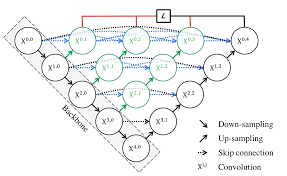

In [ ]:
from keras.layers import UpSampling2D

def build_model2(img_size, num_classes):
    inputs = Input(shape=img_size + (3,))
    rescaling = Rescaling(1./255)(inputs)
    # X0,0
    conv0_0 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(inputs)
    conv0_0 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv0_0)
    pool0_0 = MaxPooling2D(pool_size=(2, 2))(conv0_0)
    # X1,0
    conv1_0 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(pool0_0)
    conv1_0 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv1_0)
    pool1_0 = MaxPooling2D(pool_size=(2, 2))(conv1_0)
    # X2,0
    conv2_0 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(pool1_0)
    conv2_0 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv2_0)
    pool2_0 = MaxPooling2D(pool_size=(2, 2))(conv2_0)
    # X3,0
    conv3_0 = Conv2D(512, 3, activation='relu', padding='same',kernel_initializer='he_normal')(pool2_0)
    conv3_0 = Conv2D(512, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv3_0)
    pool3_0 = MaxPooling2D(pool_size=(2, 2))(conv3_0)
    # X4,0
    conv4_0 = Conv2D(1024, 3, activation='relu', padding='same',kernel_initializer='he_normal')(pool3_0)  
    conv4_0 = Conv2D(1024, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv4_0)

    # X0,1
    up1_0 = Conv2D(64, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv1_0)) 
    merge0_1 = concatenate([up1_0, conv0_0], axis = 3)
    conv0_1 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge0_1)
    conv0_1 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv0_1)
    # X1,1
    up2_0 = Conv2D(128, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv2_0))
    merge1_1 = concatenate([up2_0, conv1_0], axis = 3)
    conv1_1 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge1_1)
    conv1_1 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv1_1)
    # X2,1
    up3_0 = Conv2D(256, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv3_0))
    merge2_1 = concatenate([up3_0, conv2_0], axis = 3)
    conv2_1 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge2_1)
    conv2_1 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv2_1)
    # X3,1
    up4_0 = Conv2D(512, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv4_0))
    merge3_1 = concatenate([up4_0, conv3_0], axis = 3)
    conv3_1 = Conv2D(512, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge3_1)
    conv3_1 = Conv2D(512, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv3_1)  
    
    # X0,2
    up1_1 = Conv2D(64, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv1_1)) 
    merge0_2 = concatenate([up1_1, conv0_0, conv0_1], axis = 3)
    conv0_2 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge0_2)
    conv0_2 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv0_2)
    # X1,2
    up2_1 = Conv2D(128, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv2_1))
    merge1_2 = concatenate([up2_1, conv1_0, conv1_0], axis = 3)
    conv1_2 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge1_2)
    conv1_2 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv1_2)
    # X2,2
    up3_1 = Conv2D(256, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv3_1))
    merge2_2 = concatenate([up3_1, conv2_0, conv2_1], axis = 3)
    conv2_2 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge2_2)
    conv2_2 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv2_2)

    # X0,3
    up1_2 = Conv2D(64, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv1_2)) 
    merge0_3 = concatenate([up1_2, conv0_0, conv0_1, conv0_2], axis = 3)
    conv0_3 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge0_3)
    conv0_3 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv0_3)
    # X1,3
    up2_2 = Conv2D(128, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv2_2))
    merge1_3 = concatenate([up2_2, conv1_0, conv1_1, conv1_2], axis = 3)
    conv1_3 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge1_3)
    conv1_3 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv1_3)
    
    # X0,4
    up1_3 = Conv2D(64, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv1_3)) 
    merge0_4 = concatenate([up1_3, conv0_0, conv0_1, conv0_2, conv0_3], axis = 3)
    conv0_4 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge0_4)
    conv0_4 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv0_4)
              
    output = Conv2D(num_classes, 1, activation='softmax')(conv0_4)
    
    model = Model(inputs = inputs, outputs = output)
    
    return model

In [ ]:
model2 = build_model2(img_size=img_size, num_classes=6)
model2.summary()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

model2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

callbacks = ModelCheckpoint("seg_model2_unet++.h5", save_best_only=True)

history2 = model2.fit(train_input_imgs, train_targets, 
                    epochs=100, 
                    callbacks=callbacks,
                    batch_size=16, 
                    validation_data=(val_input_imgs, val_targets))


## 학습 결과 평가 - Unet++

In [ ]:
# 손실 그래프
epochs2 = range(2, len(history2.history["loss"]) + 1)
loss2 = history2.history["loss"][1:] # 1의 손실 함수가 너무 커서 제외
val_loss2 = history2.history["val_loss"][1:]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(epochs2, loss2, "b", label="Training loss")
plt.plot(epochs2, val_loss2, "b", label="Validation loss", color = 'red')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# 정확도 그래프
acc2 = history2.history["accuracy"][1:]
val_acc2 = history2.history["val_accuracy"][1:]

plt.subplot(1, 2, 1)
plt.plot(epochs2, acc2, "b", label="Training accuracy")
plt.plot(epochs2, val_acc2, "b", label="Validation accuracy", color = 'red')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

**아직 과적합이 발생한건지 확실하지 않은 것 같다. 에폭을 더 돌려보자!**

In [ ]:
from keras.layers import UpSampling2D

def build_model2(img_size, num_classes):
    inputs = Input(shape=img_size + (3,))
    rescaling = Rescaling(1./255)(inputs)
    # X0,0
    conv0_0 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(inputs)
    conv0_0 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv0_0)
    pool0_0 = MaxPooling2D(pool_size=(2, 2))(conv0_0)
    # X1,0
    conv1_0 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(pool0_0)
    conv1_0 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv1_0)
    pool1_0 = MaxPooling2D(pool_size=(2, 2))(conv1_0)
    # X2,0
    conv2_0 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(pool1_0)
    conv2_0 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv2_0)
    pool2_0 = MaxPooling2D(pool_size=(2, 2))(conv2_0)
    # X3,0
    conv3_0 = Conv2D(512, 3, activation='relu', padding='same',kernel_initializer='he_normal')(pool2_0)
    conv3_0 = Conv2D(512, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv3_0)
    pool3_0 = MaxPooling2D(pool_size=(2, 2))(conv3_0)
    # X4,0
    conv4_0 = Conv2D(1024, 3, activation='relu', padding='same',kernel_initializer='he_normal')(pool3_0)  
    conv4_0 = Conv2D(1024, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv4_0)

    # X0,1
    up1_0 = Conv2D(64, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv1_0)) 
    merge0_1 = concatenate([up1_0, conv0_0], axis = 3)
    conv0_1 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge0_1)
    conv0_1 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv0_1)
    # X1,1
    up2_0 = Conv2D(128, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv2_0))
    merge1_1 = concatenate([up2_0, conv1_0], axis = 3)
    conv1_1 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge1_1)
    conv1_1 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv1_1)
    # X2,1
    up3_0 = Conv2D(256, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv3_0))
    merge2_1 = concatenate([up3_0, conv2_0], axis = 3)
    conv2_1 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge2_1)
    conv2_1 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv2_1)
    # X3,1
    up4_0 = Conv2D(512, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv4_0))
    merge3_1 = concatenate([up4_0, conv3_0], axis = 3)
    conv3_1 = Conv2D(512, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge3_1)
    conv3_1 = Conv2D(512, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv3_1)  
    
    # X0,2
    up1_1 = Conv2D(64, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv1_1)) 
    merge0_2 = concatenate([up1_1, conv0_0, conv0_1], axis = 3)
    conv0_2 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge0_2)
    conv0_2 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv0_2)
    # X1,2
    up2_1 = Conv2D(128, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv2_1))
    merge1_2 = concatenate([up2_1, conv1_0, conv1_0], axis = 3)
    conv1_2 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge1_2)
    conv1_2 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv1_2)
    # X2,2
    up3_1 = Conv2D(256, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv3_1))
    merge2_2 = concatenate([up3_1, conv2_0, conv2_1], axis = 3)
    conv2_2 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge2_2)
    conv2_2 = Conv2D(256, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv2_2)

    # X0,3
    up1_2 = Conv2D(64, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv1_2)) 
    merge0_3 = concatenate([up1_2, conv0_0, conv0_1, conv0_2], axis = 3)
    conv0_3 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge0_3)
    conv0_3 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv0_3)
    # X1,3
    up2_2 = Conv2D(128, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv2_2))
    merge1_3 = concatenate([up2_2, conv1_0, conv1_1, conv1_2], axis = 3)
    conv1_3 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge1_3)
    conv1_3 = Conv2D(128, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv1_3)
    
    # X0,4
    up1_3 = Conv2D(64, 2, activation='relu', padding='same',kernel_initializer='he_normal')(UpSampling2D(size = (2,2))(conv1_3)) 
    merge0_4 = concatenate([up1_3, conv0_0, conv0_1, conv0_2, conv0_3], axis = 3)
    conv0_4 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(merge0_4)
    conv0_4 = Conv2D(64, 3, activation='relu', padding='same',kernel_initializer='he_normal')(conv0_4)
              
    output = Conv2D(num_classes, 1, activation='softmax')(conv0_4)
    
    model = Model(inputs = inputs, outputs = output)
    
    return model

In [ ]:
model2 = build_model2(img_size=img_size, num_classes=6)
model2.summary()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

model2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

callbacks = ModelCheckpoint("seg_model2_unet++.h5", save_best_only=True)

history2 = model2.fit(train_input_imgs, train_targets, 
                    epochs=200, 
                    callbacks=callbacks,
                    batch_size=16, 
                    validation_data=(val_input_imgs, val_targets))

In [ ]:
# 손실 그래프
epochs2 = range(2, len(history2.history["loss"]) + 1)
loss2 = history2.history["loss"][1:] # 1의 손실 함수가 너무 커서 제외
val_loss2 = history2.history["val_loss"][1:]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(epochs2, loss2, "b", label="Training loss")
plt.plot(epochs2, val_loss2, "b", label="Validation loss", color = 'red')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# 정확도 그래프
acc2 = history2.history["accuracy"][1:]
val_acc2 = history2.history["val_accuracy"][1:]

plt.subplot(1, 2, 1)
plt.plot(epochs2, acc2, "b", label="Training accuracy")
plt.plot(epochs2, val_acc2, "b", label="Validation accuracy", color = 'red')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.models import load_model

test_loss2, test_accuracy2 = model2.evaluate(test_input_imgs, test_targets)

# 평가 결과 출력
print("Test Loss:", test_loss2)
print("Test Accuracy:", test_accuracy2)

In [ ]:
prediction2 = model2.predict(test_input_imgs)

In [ ]:
plt.subplot(1,3,1)
plt.imshow(test_input_imgs[0]/255)

plt.subplot(1,3,2)
output2 = np.argmax(prediction2[0], axis=-1)
plt.imshow(output2)

plt.subplot(1,3,3)
plt.imshow(test_targets[0])

***
**segnet**
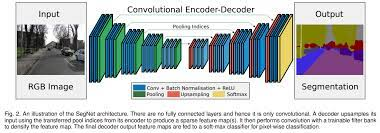

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization

def build_model3(img_size, num_classes):
    inputs = Input(shape=img_size + (3,))
    rescaling = Rescaling(1./255)(inputs)

    # Block 1
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x, mask_1 = MaxPooling2D(pool_size=(2, 2))(x), x

    # Block 2
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x, mask_2 = MaxPooling2D(pool_size=(2, 2))(x), x

    # Block 3
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x, mask_3 = MaxPooling2D(pool_size=(2, 2))(x), x

    # Block 4
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x, mask_4 = MaxPooling2D(pool_size=(2, 2))(x), x

    # Decoder
    # Block 4
    x = UpSampling2D(size=(2, 2))(x)
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = x + mask_4

    # Block 3
    x = UpSampling2D(size=(2, 2))(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = x + mask_3

    # Block 2
    x = UpSampling2D(size=(2, 2))(x)
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = x + mask_2

    # Block 1
    x = UpSampling2D(size=(2, 2))(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = x + mask_1

    # Output layer
    outputs = Conv2D(num_classes, (1, 1), activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
model3 = build_model3(img_size=img_size, num_classes=6)
model3.summary()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

model3.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

callbacks = ModelCheckpoint("seg_model3_segnet.h5", save_best_only=True)

history3 = model3.fit(train_input_imgs, train_targets, 
                    epochs=100,
                    callbacks=callbacks,
                    batch_size=16, 
                    validation_data=(val_input_imgs, val_targets))


## 학습 결과 평가 - segnet

In [ ]:
# 손실 그래프
epochs3 = range(12, len(history3.history["loss"])) # 12의 손실 함수가 너무 커서 그 이후로
loss3 = history3.history["loss"][12:]
val_loss3 = history3.history["val_loss"][12:]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(epochs3, loss3, "b", label="Training loss")
plt.plot(epochs3, val_loss3, "b", label="Validation loss", color = 'red')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# 정확도 그래프
acc3 = history3.history["accuracy"][12:]
val_acc3 = history3.history["val_accuracy"][12:]

plt.subplot(1, 2, 1)
plt.plot(epochs3, acc3, "b", label="Training accuracy")
plt.plot(epochs3, val_acc3, "b", label="Validation accuracy", color = 'red')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

**에폭 58일 때 튀는 값이 나오긴 하지만, 아직 과적합이 발생한 거 같지는 않다. 에폭을 더 돌려보자!**

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization

def build_model3(img_size, num_classes):
    inputs = Input(shape=img_size + (3,))
    rescaling = Rescaling(1./255)(inputs)

    # Block 1
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x, mask_1 = MaxPooling2D(pool_size=(2, 2))(x), x

    # Block 2
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x, mask_2 = MaxPooling2D(pool_size=(2, 2))(x), x

    # Block 3
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x, mask_3 = MaxPooling2D(pool_size=(2, 2))(x), x

    # Block 4
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x, mask_4 = MaxPooling2D(pool_size=(2, 2))(x), x

    # Decoder
    # Block 4
    x = UpSampling2D(size=(2, 2))(x)
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = x + mask_4

    # Block 3
    x = UpSampling2D(size=(2, 2))(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = x + mask_3

    # Block 2
    x = UpSampling2D(size=(2, 2))(x)
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = x + mask_2

    # Block 1
    x = UpSampling2D(size=(2, 2))(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = x + mask_1

    # Output layer
    outputs = Conv2D(num_classes, (1, 1), activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
model3 = build_model3(img_size=img_size, num_classes=6)
model3.summary()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

model3.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

callbacks = ModelCheckpoint("seg_model3_segnet.h5", save_best_only=True)

history3 = model3.fit(train_input_imgs, train_targets, 
                    epochs=200, 
                    callbacks=callbacks,
                    batch_size=16, 
                    validation_data=(val_input_imgs, val_targets))


## 학습 결과 평가 - segnet

In [ ]:
# 손실 그래프
epochs3 = range(12, len(history3.history["loss"])) # 12의 손실 함수가 너무 커서 그 이후로
loss3 = history3.history["loss"][12:]
val_loss3 = history3.history["val_loss"][12:]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(epochs3, loss3, "b", label="Training loss")
plt.plot(epochs3, val_loss3, "b", label="Validation loss", color = 'red')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# 정확도 그래프
acc3 = history3.history["accuracy"][12:]
val_acc3 = history3.history["val_accuracy"][12:]

plt.subplot(1, 2, 1)
plt.plot(epochs3, acc3, "b", label="Training accuracy")
plt.plot(epochs3, val_acc3, "b", label="Validation accuracy", color = 'red')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.models import load_model

test_loss3, test_accuracy3 = model3.evaluate(test_input_imgs, test_targets)

# 평가 결과 출력
print("Test Loss:", test_loss3)
print("Test Accuracy:", test_accuracy3)

In [ ]:
prediction3 = model3.predict(test_input_imgs)

In [ ]:
plt.subplot(1,3,1)
plt.imshow(test_input_imgs[0]/255)

plt.subplot(1,3,2)
output3 = np.argmax(prediction3[0], axis=-1)
plt.imshow(output3)

plt.subplot(1,3,3)
plt.imshow(test_targets[0])

***
**Deeplab**
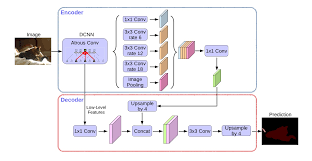

성능 => metric
모델 사이즈 확인하기
pre-trained